In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
# Import dataset
hotels = 'hotel_bookings.csv'
hotelbookings_df = pd.read_csv(hotels)
hotelbookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Lets check the size of dataset
hotelbookings_df.shape

(119390, 32)

In [5]:
# get information about dataset
hotelbookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Statistical Analysis
hotelbookings_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# lets check is there any null values available in the dataset
hotelbookings_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Observations:**

We can see there are columns: children - 4, country-488, agent - 16340 and company column has 112593 null values

In [8]:
# We need to fill some columns who consists null values with appropriate value.

hotelbookings_df['children'].fillna(0, inplace=True)
hotelbookings_df['country'].fillna('XYZ', inplace=True)
hotelbookings_df['children']=hotelbookings_df['children'].astype(int)

In [9]:
# Lets check again info/datatypes correct or not
hotelbookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int32  
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# Lets check what are the columns available
hotelbookings_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
# dropping babies column as they are not accounted into monetary aspects.
hotelbookings_df['Total_Guests']=hotelbookings_df['adults']+hotelbookings_df['children']

In [ ]:
# Drop unnessesary columns.
hotelbookings_df = hotelbookings_df.drop(['adults', 'children'], axis=1)

In [14]:
# Lets check there is no any value available below 0 in total guest.
hotelbookings_df = hotelbookings_df[hotelbookings_df.Total_Guests > 0]

In [15]:
hotelbookings_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,2
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,2


In [16]:
# check the unique values
hotelbookings_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [17]:
# selected only those rows which have don't have booking cancellation.
hotelbookings_df[hotelbookings_df.is_canceled == 0]
hotelbookings_df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guests
80694,City Hotel,0,32,2015,November,47,20,0,2,1,...,119.0,NaN,0,Transient-Party,73.0,0,0,Check-Out,2015-11-22,1


In [18]:
resort_hotel_df = hotelbookings_df[hotelbookings_df.hotel == 'Resort Hotel']
city_hotel_df = hotelbookings_df[hotelbookings_df.hotel == 'City Hotel']

**1. Visualizing Hotel Wise yearly Bookings**

Text(0.5, 1.0, 'yearly bookings')

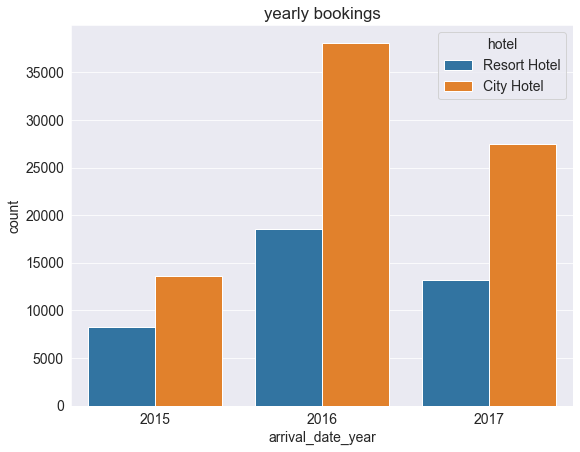

In [19]:
sns.countplot (x = 'arrival_date_year', data = hotelbookings_df, hue='hotel').set_title ('yearly bookings')

**Observation:**

***Bookings across years is highes for city hotel compared to resort hotel and do not increase proportionately over the years***

**2. From where the most guests are coming ?**

<AxesSubplot:>

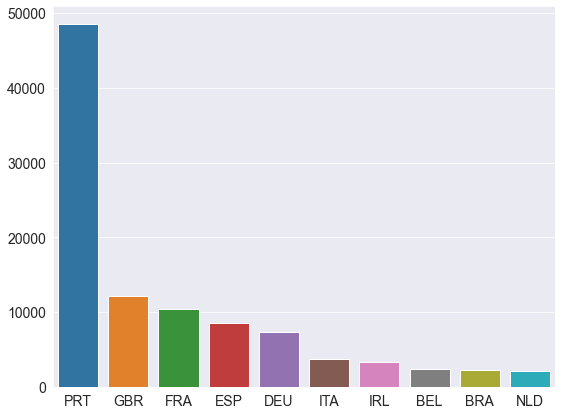

In [20]:
sns.barplot(y=list(hotelbookings_df.country.value_counts().head(10)),
           x=list(hotelbookings_df.country.value_counts().head(10).index))

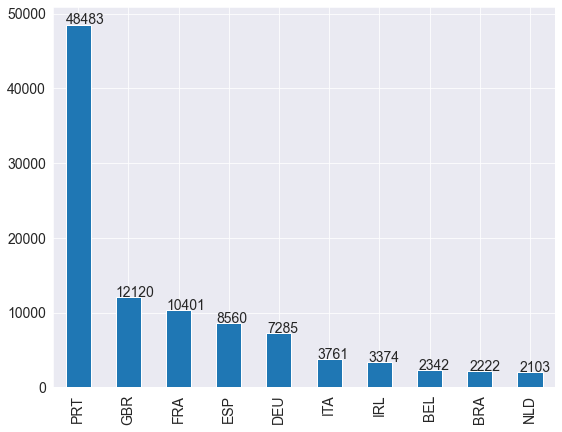

In [21]:
# plotting one more graph with values
ax = hotelbookings_df.country.value_counts().head(10).plot (kind = 'bar');

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


**Observations**

***We can in see in the above plot there are maximum people coming from PRT(portugal) 
and other top 9 countries respectively.***

***And, other plot shows the number of people coming from different contries***

**3. Visualizing proportion of booking cancellations**

                count      mean       std  min  25%  50%  75%  max
hotel                                                             
City Hotel    79163.0  0.417859  0.493210  0.0  0.0  0.0  1.0  1.0
Resort Hotel  40047.0  0.277674  0.447857  0.0  0.0  0.0  1.0  1.0


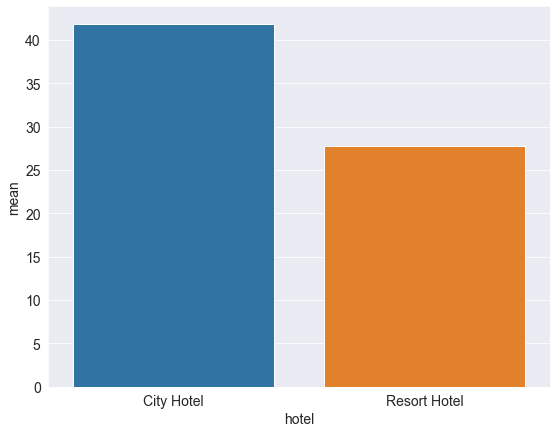

In [22]:
a = hotelbookings_df.groupby('hotel')['is_canceled'].describe()
print(a)
sns.barplot(x=a.index, y=a['mean'] * 100);

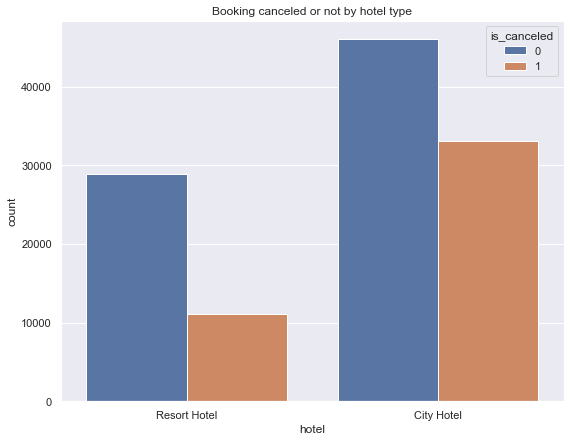

In [23]:
# another plot including hue as cancellation
sns.set(style = 'darkgrid')
plt.title('Booking canceled or not by hotel type')
ax = sns.countplot(x = 'hotel', hue = 'is_canceled', data = hotelbookings_df)

**Observation**

***As we can see in the above plot more than 40% bookings were canceled in city hotel and around 30% bookings were canceled in resorts hotel***

**4. Visualizing monthly bookings and monthly cancellations**

In [24]:
# Lets take different values of month count into account.
df_copy = hotelbookings_df.copy()
df_copy['no_of_bookings']=1
df_copy.loc[(df_copy.arrival_date_month=='July')| (df_copy.arrival_date_month=='August'),'no_of_bookings']/=3
df_copy.loc[~((df_copy.arrival_date_month=='July')|(df_copy.arrival_date_month=='August')),'no_of_bookings']/=2
df_copy.sample(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guests,no_of_bookings
97865,City Hotel,0,27,2016,September,39,20,0,1,2,...,NaN,0,Transient-Party,95.00,0,0,Check-Out,2016-09-21,2,0.500000
16479,Resort Hotel,0,42,2015,August,35,26,0,4,2,...,NaN,0,Transient,135.14,0,0,Check-Out,2015-08-30,2,0.333333
27026,Resort Hotel,0,12,2016,August,34,16,0,2,2,...,NaN,0,Transient,221.00,0,0,Check-Out,2016-08-18,2,0.333333
89693,City Hotel,0,25,2016,May,22,22,2,1,2,...,NaN,0,Transient,109.00,0,2,Check-Out,2016-05-25,2,0.500000
72397,City Hotel,1,467,2017,July,30,28,0,1,2,...,NaN,0,Transient,90.00,0,0,Canceled,2016-07-07,2,0.333333
54083,City Hotel,1,245,2016,July,28,6,2,4,1,...,NaN,0,Transient,110.00,0,0,Canceled,2016-02-23,1,0.333333
85857,City Hotel,0,2,2016,March,13,22,0,1,2,...,NaN,0,Transient,89.00,0,0,Check-Out,2016-03-23,2,0.500000
13219,Resort Hotel,1,341,2017,August,31,5,2,1,2,...,NaN,0,Transient,259.33,0,0,Canceled,2017-05-27,4,0.333333
49783,City Hotel,1,103,2016,April,17,19,0,2,1,...,NaN,0,Transient,115.00,0,0,Canceled,2016-02-25,1,0.500000
115450,City Hotel,0,405,2017,July,27,4,0,2,2,...,NaN,0,Transient-Party,114.40,0,0,Check-Out,2017-07-06,2,0.333333


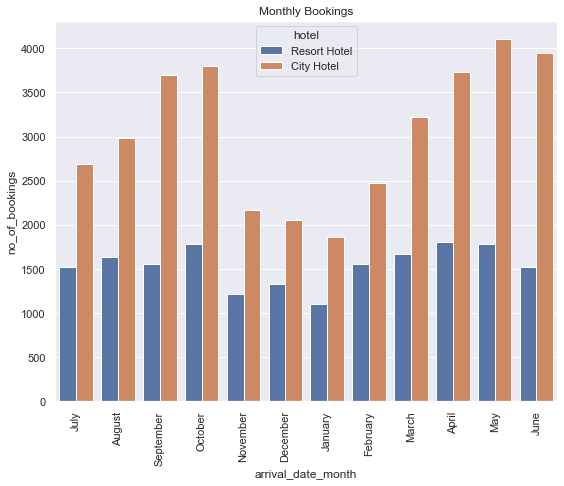

In [25]:
month_sorted = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.title('Monthly Bookings')
sns.barplot(x = 'arrival_date_month', y = 'no_of_bookings', hue= df_copy['hotel'], estimator= sum, data= df_copy)
plt.xticks(rotation = 90)
plt.show()

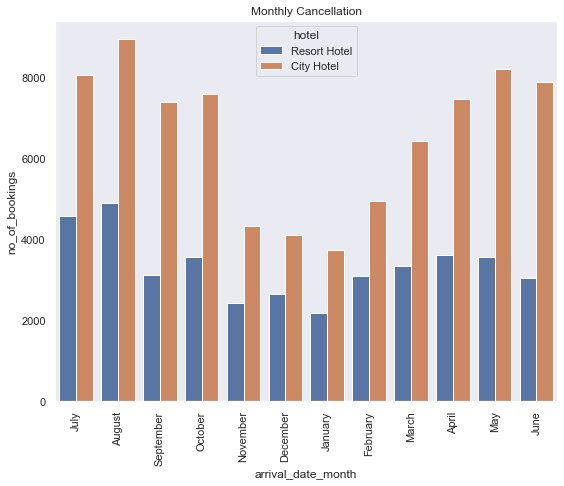

In [26]:
df_copy1 = hotelbookings_df.copy()
df_copy1['no_of_bookings']=1
df_copy.loc[(df_copy1.arrival_date_month=='July')| (df_copy1.arrival_date_month=='August'),'no_of_bookings']/=3
df_copy.loc[~((df_copy1.arrival_date_month=='July')|(df_copy1.arrival_date_month=='August')),'no_of_bookings']/=2
df_copy1.sample(50)
b = df_copy1[df_copy1.is_canceled==1]
month_sorted = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.set(style='dark')
plt.title('Monthly Cancellation')
sns.barplot(x = 'arrival_date_month', y = 'no_of_bookings', hue = df_copy1['hotel'], estimator = sum, data = df_copy1)
plt.xticks(rotation = 90)
plt.show()

**Observation**

We can see in the above Monthly Bookings plot bookings are incresing in the month of july, august, septeber to till october and then from November, december and January bookings are decresed in this three months and after this three months we can see again increment in the bookings from february to till May.

We can see in the Monthly Cancelation plot most of the bookings are canceled in July to Octomber and November to January booking cancelation also low because there is no bookings as compare to other months.Again from feb to June we can see increment of booking cancelation.

**5. Market segment wise bookings**

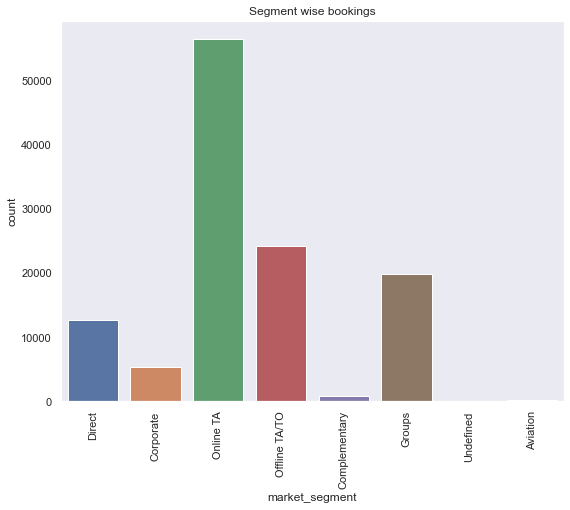

In [27]:
plt.title('Segment wise bookings')
ax = sns.countplot(x = 'market_segment', data=hotelbookings_df)
plt.xticks(rotation = 90)
plt.show()

**Observations**

As per the above plot we can see indirect bookings through online and offline travel agents are much higher compared to direct bookings.plot show segment of OnlineTA is on Top and then offlineTA/TO, Groups, Direct etc.

**6. Plotting monthly cancellations and customer type**

<AxesSubplot:xlabel='customer_type', ylabel='mean'>

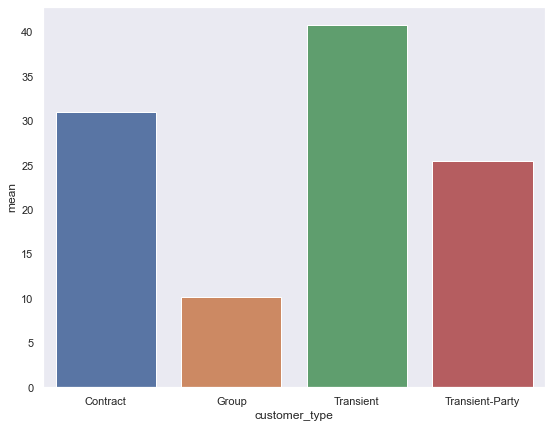

In [28]:
a = hotelbookings_df.groupby('customer_type')['is_canceled'].describe()
sns.barplot(x=a.index, y=a['mean'] * 100)

**Observations**

In the above we can see Transient customer type has higher cancelation rate and then Contract, Transient-Party and Group respectively

**Relationship between lead time and cancellation**

(array([21764.,  9211.,  6947.,  6734.,  5486.,  4954.,  4657.,  4131.,
         3932.,  3717.,  3438.,  3315.,  2713.,  2791.,  2563.,  2845.,
         2701.,  2360.,  2433.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190]),
 <BarContainer object of 19 artists>)

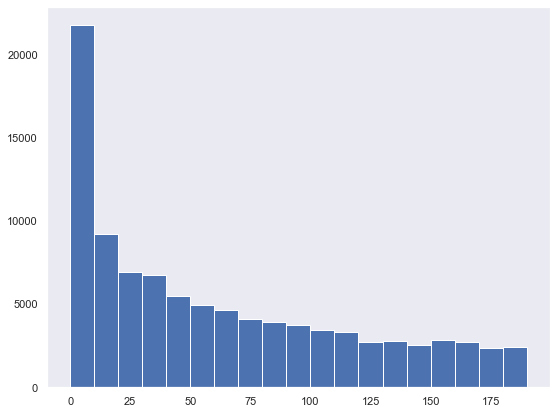

In [29]:
plt.hist(hotelbookings_df.lead_time, bins=np.arange(0, 200, 10))

<AxesSubplot:xlabel='lead_time', ylabel='mean'>

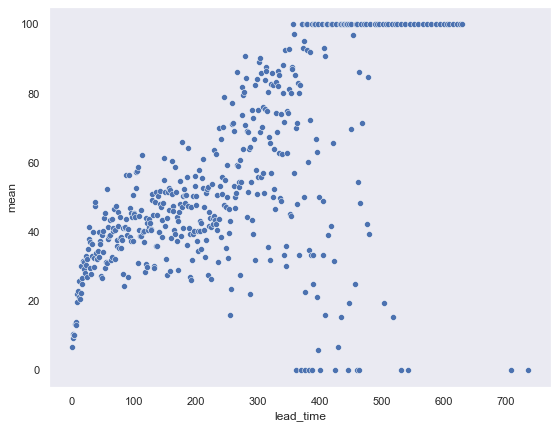

In [30]:
a = hotelbookings_df.groupby('lead_time')['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a['mean'] * 100)

**Observation**

Lead time has correlation with cancelation positively.

**Relationship between deposit type and cancellation**

In [31]:
hotelbookings_df[hotelbookings_df.deposit_type=='Refundable'].deposit_type.count()

162

<AxesSubplot:title={'center':'Booking Canceled or Not by Deposit Type'}, xlabel='deposit_type', ylabel='count'>

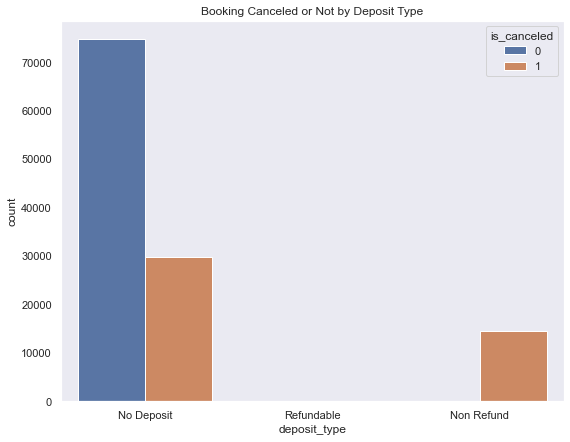

In [32]:
plt.title('Booking Canceled or Not by Deposit Type')
sns.countplot(x = 'deposit_type', data = hotelbookings_df, hue = 'is_canceled')

**Observation:**

We can see around More than 25% of bookings canceled by guests with no deposit which is higher number if the hotels were not able to replace the cnaceled booking on time and those guests who do not pay any deposit while booking are likely to cancel more reservations. The intresting fact is non refundable deposits has more cancellation as per compare to refundable deposits.
Generally refundable deposits have more cancellation as hotel rates are higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.

**Relationship between market segment and cancellation**

<AxesSubplot:title={'center':'Booking Canceled or Not by Market Segment'}, xlabel='market_segment', ylabel='count'>

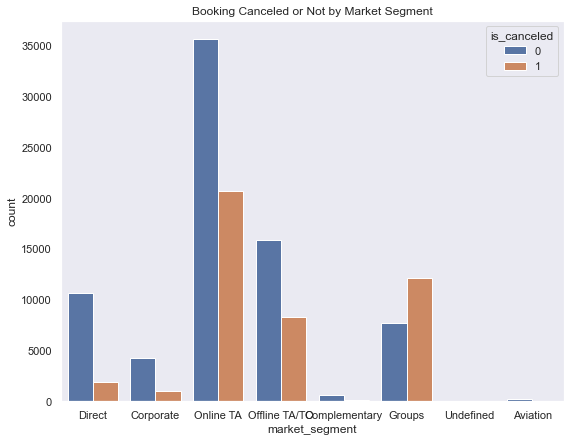

In [33]:
plt.title('Booking Canceled or Not by Market Segment')
sns.countplot(x = 'market_segment', data = hotelbookings_df, hue = 'is_canceled')

**Observation:**

As per the plot there are 50% cancellation rate in Group Segment.Offline TA/TO(Travel Agents/Tour Operators) and Online TA has cancellation rate is more than 33%. It is surprising that the cancellation rate in these segments is high despite the application of a deposit. The fact that cancellations are made collectively like group reservation has high cancellation rate.
And the intresting thing is direct segment has cancellation rate less than 20%.
    

**Relationship between previous cancellations and cancellation**

In [34]:
hotelbookings_df[hotelbookings_df.previous_cancellations==1].count()

hotel                             6048
is_canceled                       6048
lead_time                         6048
arrival_date_year                 6048
arrival_date_month                6048
arrival_date_week_number          6048
arrival_date_day_of_month         6048
stays_in_weekend_nights           6048
stays_in_week_nights              6048
adults                            6048
children                          6048
babies                            6048
meal                              6048
country                           6048
market_segment                    6048
distribution_channel              6048
is_repeated_guest                 6048
previous_cancellations            6048
previous_bookings_not_canceled    6048
reserved_room_type                6048
assigned_room_type                6048
booking_changes                   6048
deposit_type                      6048
agent                             5394
company                            505
days_in_waiting_list     

In [35]:
hotelbookings_df.previous_cancellations.unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11],
      dtype=int64)

In [36]:
hotelbookings_df.groupby('previous_cancellations').count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guests
previous_cancellations,,,,,,,,,,,,,,,,,,,,,
0,112731,112731,112731,112731,112731,112731,112731,112731,112731,112731,...,97367,6082,112731,112731,112731,112731,112731,112731,112731,112731
1,6048,6048,6048,6048,6048,6048,6048,6048,6048,6048,...,5394,505,6048,6048,6048,6048,6048,6048,6048,6048
2,114,114,114,114,114,114,114,114,114,114,...,34,71,114,114,114,114,114,114,114,114
3,65,65,65,65,65,65,65,65,65,65,...,9,50,65,65,65,65,65,65,65,65
4,31,31,31,31,31,31,31,31,31,31,...,0,26,31,31,31,31,31,31,31,31
5,19,19,19,19,19,19,19,19,19,19,...,1,18,19,19,19,19,19,19,19,19
6,22,22,22,22,22,22,22,22,22,22,...,6,16,22,22,22,22,22,22,22,22
11,35,35,35,35,35,35,35,35,35,35,...,25,0,35,35,35,35,35,35,35,35
13,12,12,12,12,12,12,12,12,12,12,...,4,0,12,12,12,12,12,12,12,12


<AxesSubplot:title={'center':'previous_cancellations vs cancellations'}, xlabel='previous_cancellations', ylabel='is_canceled'>

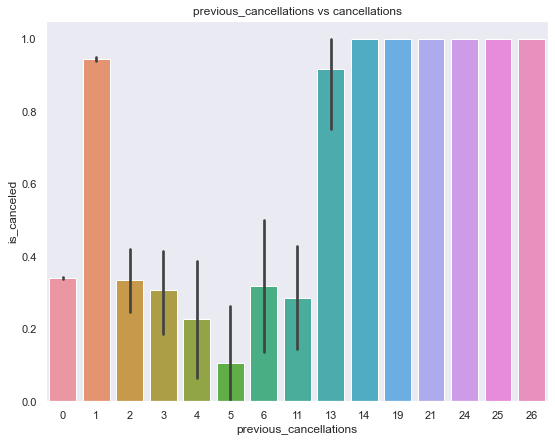

In [37]:
plt.title('previous_cancellations vs cancellations')
sns.barplot(x= 'previous_cancellations' , y= 'is_canceled', data = hotelbookings_df)

**Observation**

The plots shows those customer who have canceled previously once have high chance of cnacellation compared to 0 previous cnacellation. For higher values of previous cancellations, numbers are less and it can be ignored.

**Lets see price in hotels vary over the year**

In [38]:
hotelbookings_df['adr_pp']=hotelbookings_df.adr/hotelbookings_df.Total_Guests
monthlyadr_df = hotelbookings_df.groupby (['hotel', 'arrival_date_month'])['adr_pp'].mean()
monthlyadr_df = pd.DataFrame({'hotel':(map(lambda x:x[0], monthlyadr_df.index)), 'month': list(map(lambda x:x[1],monthlyadr_df.index)), 'mean': monthlyadr_df.values})
monthlyadr_df

,hotel,month,mean
0,City Hotel,April,58.714542
1,City Hotel,August,55.300998
2,City Hotel,December,48.578168
3,City Hotel,February,49.172672
4,City Hotel,January,50.800087
5,City Hotel,July,54.834401
6,City Hotel,June,67.899081
7,City Hotel,March,52.362169
8,City Hotel,May,71.068304
9,City Hotel,November,56.982024


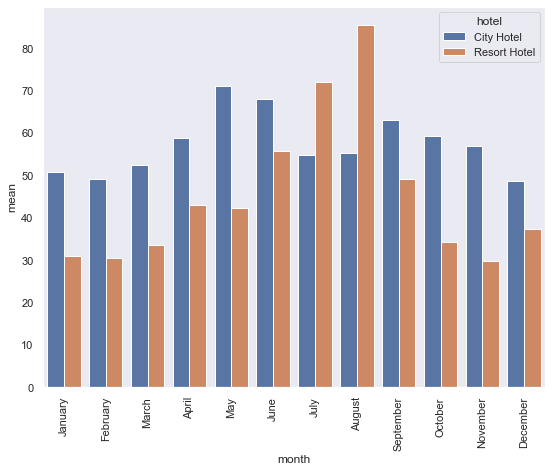

In [39]:
month_sorted = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
sns.barplot (y='mean', x='month', data=monthlyadr_df, hue='hotel',order=month_sorted)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr_pp'>

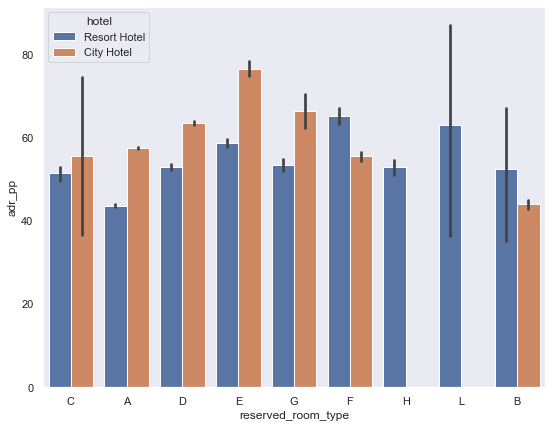

In [40]:
# Plotting variaation in adr with room_type]
sns.barplot(data = hotelbookings_df, x='reserved_room_type', y = 'adr_pp', hue = 'hotel')

<AxesSubplot:xlabel='meal', ylabel='adr_pp'>

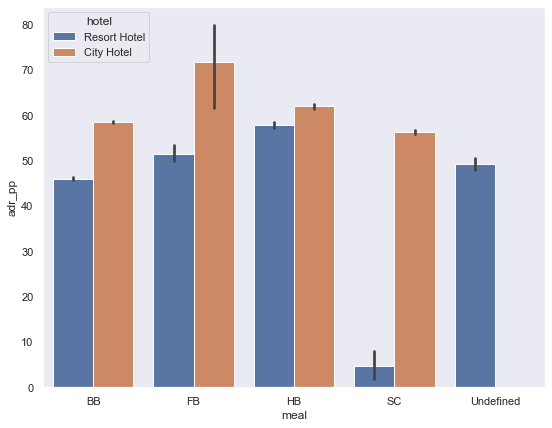

In [41]:
# Plotting variaation in adr with meal_type
sns.barplot(data = hotelbookings_df, x = 'meal', y = 'adr_pp', hue = 'hotel')

<AxesSubplot:xlabel='market_segment', ylabel='adr_pp'>

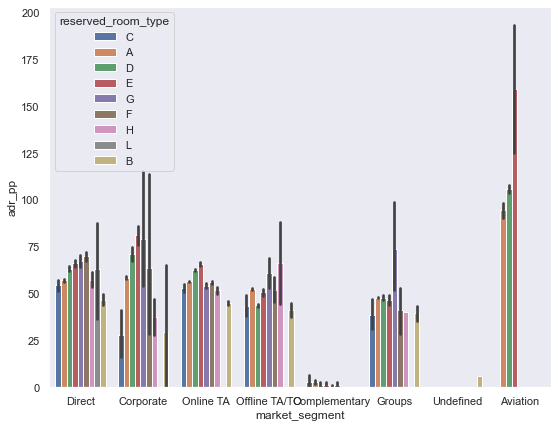

In [43]:
sns.barplot(x = 'market_segment', y = 'adr_pp', hue = 'reserved_room_type', data = hotelbookings_df)

**Observation**

This plot shows that the Resort Hotel pricess are higher during the summer and City Hotel has less pricess and are most expensive during Sprinbg and Autumn and these vary with room type and meal type.

**References:**

1) https://stackoverflow.com/

2) https://matplotlib.org/

3) https://pandas.pydata.org

3) https://www.geeksforgeeks.org/

# THANK YOU !